## Load yolo model

In [1]:
!bash load_model.sh

--2024-07-19 17:40:33--  https://pjreddie.com/media/files/yolov3.weights
Résolution de pjreddie.com (pjreddie.com)… 162.0.215.52
Connexion à pjreddie.com (pjreddie.com)|162.0.215.52|:443… connecté.
requête HTTP transmise, en attente de la réponse… 200 OK
Taille : 248007048 (237M) [application/octet-stream]
Enregistre : ‘yolov3.weights’

yolov3.weights        0%[                    ]       0  --.-KB/s               ^C


In [ ]:
!pip install -r requirements.txt

In [94]:
import cv2
import numpy as np

net = cv2.dnn.readNetFromDarknet('src/yolov3.cfg', 'src/yolov3.weights')
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)

In [91]:
with open("src/coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

In [92]:
ln = net.getLayerNames()
ln = [ln[i - 1] for i in net.getUnconnectedOutLayers()]
print(len(ln), ln)

3 ['yolo_82', 'yolo_94', 'yolo_106']


## Predict image

In [85]:
path_image = "road.jpeg"
image = cv2.imread(path_image)
height, width, channels = image.shape
blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

In [66]:
# Création du blob à partir de l'image

net.setInput(blob)
outs = net.forward(ln)

In [67]:
print(len(outs))
for out in outs:
    print(out.shape)

3
(507, 85)
(2028, 85)
(8112, 85)


In [74]:
# Analyse des résultats
class_ids = []
confidences = []
boxes = []

for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Extraction des coordonnées du rectangle délimitant
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

# Application de la suppression de non-maxima
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

BOXS = []
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        BOXS.append((x, y, w, h, class_ids[i]))


In [89]:

# Dessin des rectangles et des labels sur l'image
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0, 255, size=(len(classes), 3))

final_image = image.copy()
for i in range(len(BOXS)):
    x, y, w, h, id = BOXS[i]
    label = str(classes[id])
    color = colors[id]
    cv2.rectangle(final_image, (x, y), (x + w, y + h), color, 1)
        #cv2.putText(image, label, (x, y - 10), font, 1, color, 2)

array([[[ 29,  23,  28],
        [ 15,  10,  12],
        [  2,   1,   0],
        ...,
        [145, 145, 145],
        [147, 147, 147],
        [115, 117, 118]],

       [[ 18,  12,  17],
        [ 13,   8,  10],
        [  2,   1,   0],
        ...,
        [  7,   9,  10],
        [ 25,  27,  28],
        [ 56,  59,  63]],

       [[  6,   0,   5],
        [ 13,   8,  10],
        [  4,   3,   0],
        ...,
        [128, 134, 139],
        [119, 125, 130],
        [ 97, 103, 108]],

       ...,

       [[121, 116, 107],
        [121, 116, 107],
        [121, 116, 107],
        ...,
        [ 93,  84,  75],
        [ 92,  83,  74],
        [ 92,  83,  74]],

       [[121, 116, 107],
        [121, 116, 107],
        [120, 115, 106],
        ...,
        [ 92,  83,  74],
        [ 91,  82,  73],
        [ 91,  82,  73]],

       [[120, 115, 106],
        [120, 115, 106],
        [120, 115, 106],
        ...,
        [ 92,  83,  74],
        [ 91,  82,  73],
        [ 90,  81,  72]]], dtype=uint8)
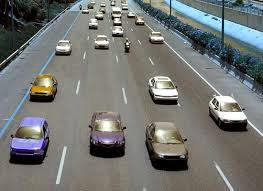

In [86]:
image

array([[[ 29,  23,  28],
        [ 15,  10,  12],
        [  2,   1,   0],
        ...,
        [145, 145, 145],
        [147, 147, 147],
        [115, 117, 118]],

       [[ 18,  12,  17],
        [ 13,   8,  10],
        [  2,   1,   0],
        ...,
        [  7,   9,  10],
        [ 25,  27,  28],
        [ 56,  59,  63]],

       [[  6,   0,   5],
        [ 13,   8,  10],
        [  4,   3,   0],
        ...,
        [128, 134, 139],
        [119, 125, 130],
        [ 97, 103, 108]],

       ...,

       [[121, 116, 107],
        [121, 116, 107],
        [121, 116, 107],
        ...,
        [ 93,  84,  75],
        [ 92,  83,  74],
        [ 92,  83,  74]],

       [[121, 116, 107],
        [121, 116, 107],
        [120, 115, 106],
        ...,
        [ 92,  83,  74],
        [ 91,  82,  73],
        [ 91,  82,  73]],

       [[120, 115, 106],
        [120, 115, 106],
        [120, 115, 106],
        ...,
        [ 92,  83,  74],
        [ 91,  82,  73],
        [ 90,  81,  72]]], dtype=uint8)
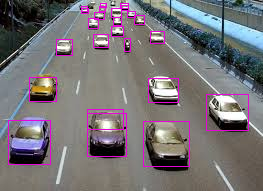

In [90]:
final_image